In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from datetime import datetime
import math
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, LSTM, Reshape, Lambda, RepeatVector, TimeDistributed
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from functions import feature_extraction
import warnings
# from pandas.core.common import SettingWithCopyWarning

# warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [6]:
AEP = pd.read_csv('AEP_hourly.csv')
AEP = AEP.rename(columns={'AEP_MW': 'Load'})
features, data = feature_extraction(AEP, diff_in_hour=1, num_days_ago=21, num_hours_forecasting=24,  test_split = 0.1, validation_split = 0.2)

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:5

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:5

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:58: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ago'] = df['Load'].shift(i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:5

/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ahead'] = df['Load'].shift(-i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/functions.py:64: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'{i * diff_in_hour}_hrs_ahead'] = df['Load'].shift(-i)
/Users/eliorsegev/Library/Mobile Documents/com~apple~CloudDocs/Studying/Uni/Master/papers/Ram/function

In [7]:
x_train = np.concatenate((data['x_train_seq'],data['x_train_dt']), axis=1)
y_train = data['y_train']
x_val = np.concatenate((data['x_val_seq'],data['x_val_dt']), axis=1)
y_val = data['y_val']
x_test = np.concatenate((data['x_test_seq'],data['x_test_dt']), axis=1)
y_test = data['y_test']

This is a NN model:

In [14]:
x_train.shape

(84388, 513)

In [27]:
input_layer = Input(shape=(x_train.shape[1]))

dense = Dense(512, activation='relu')(input_layer)
layers = [int(512/2**(i)) for i in range(1,3)]

for l in layers:
    dense = Dense(l, activation='relu')(dense)
    dense = Dropout(0.01)(dense)
    
output_layer = Dense(24)(dense)

model_NN = Model(inputs = input_layer, outputs= output_layer)

model_NN.compile(optimizer='adam', loss='mse', metrics=['mae'])
# model_NN.summary()
history_NN = model_NN.fit(x_train, y_train, epochs=5, validation_data=(x_val, y_val))

Epoch 1/5
2638/2638 [==============================] - 9s 3ms/step - loss: 2.8021 - mae: 0.8538 - val_loss: 0.2569 - val_mae: 0.3936
Epoch 2/5
2638/2638 [==============================] - 8s 3ms/step - loss: 0.2303 - mae: 0.3650 - val_loss: 0.1778 - val_mae: 0.3261
Epoch 3/5
2638/2638 [==============================] - 9s 4ms/step - loss: 0.1681 - mae: 0.3109 - val_loss: 0.1842 - val_mae: 0.3252
Epoch 4/5
2638/2638 [==============================] - 10s 4ms/step - loss: 0.1481 - mae: 0.2906 - val_loss: 0.1453 - val_mae: 0.2858
Epoch 5/5
2638/2638 [==============================] - 10s 4ms/step - loss: 0.1343 - mae: 0.2752 - val_loss: 0.1410 - val_mae: 0.2792


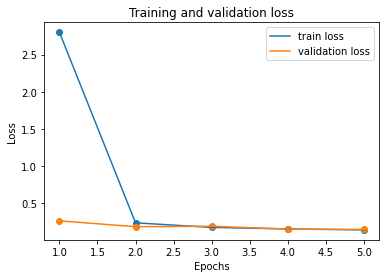

In [31]:
plt.plot(range(1,len(history_NN.history['loss'])+1),history_NN.history['loss'], label='train loss')
plt.plot(range(1,len(history_NN.history['val_loss'])+1), history_NN.history['val_loss'], label='validation loss')
plt.scatter(range(1, len(history_NN.history['loss'])+1),history_NN.history['loss'])
plt.scatter(range(1, len(history_NN.history['val_loss'])+1), history_NN.history['val_loss'])
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
y_hat = np.array(model_NN.predict(x_val))
y_hat = y_hat*data['std_value_load'] + data['mean_value_load']
y = y_val*data['std_value_load'] + data['mean_value_load']

758/758 [==============================] - 1s 1ms/step


y mean: 14972.633888201746, y std: 2619.4099632823054
y_hat mean: 14829.6337890625, y_hat std: 2282.071044921875


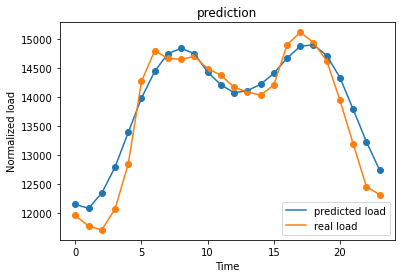

In [36]:
index = 6000

print(f'y mean: {y.mean()}, y std: {y.std()}')
print(f'y_hat mean: {y_hat.mean()}, y_hat std: {y_hat.std()}')

y_plot_hat = y_hat[index,:]
y_plot = y[index,:]

plt.plot(range(len(y_plot_hat)), y_plot_hat, label='predicted load')
plt.plot(range(len(y_plot)), y_plot, label='real load')
plt.scatter(range(len(y_plot_hat)), y_plot_hat)
plt.scatter(range(len(y_plot)), y_plot)
plt.title('prediction')
plt.xlabel('Time')
plt.ylabel('Normalized load')
plt.legend()
plt.show()